In [1]:
### ValDXer testing
import os
os.environ["HDXER_PATH"] = "/home/alexi/Documents/HDXer"

from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.coordinates.XTC import XTCWriter

from pdbfixer import PDBFixer
from openmm.app import PDBFile

settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'R3'
settings.stride = 1000
# settings.HDXer_stride = 10000

settings.RW_do_reweighting = False
settings.RW_do_params = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MBPwt1_test"


/home/alexi/Documents/ValDX


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
Experiment name test_full0.5 already exists. Attempting t

In [2]:
# ### add code to read in sequence from CIF file instead of copying it manually

# cif_file = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein/AF-P0AEX9-F1-model_v4.cif"

# sequence_header = "_entity_poly.pdbx_seq_one_letter_code"
# sequence = ""
# seq_head_idx = 0
# with open(cif_file, 'r') as f:
#     lines = f.readlines()
#     for idx, line in enumerate(lines):
#         if sequence_header in line:
#             seq_head_idx = idx+1
#             break
    
#     for idx, line in enumerate(lines[seq_head_idx:]):
#         if idx > 0 and line[0] == ";":
#             break
#         sequence += line.strip()


# # print(sequence)



# # strip sequence of non letters
# sequence = ''.join([i for i in sequence if i.isalpha()])

# print(sequence)

# print("Sequence length: ", len(sequence))


# # convert sequence to FASTA format
# def write_fasta(sequence, header, file_name):
#     """
#     Writes a single-letter amino acid sequence to a FASTA file.
    
#     Parameters:
#     - sequence: A string containing the amino acid sequence.
#     - header: A string to be used as the header in the FASTA file.
#     - file_name: The name of the FASTA file to be created.
#     """
#     print(f"Writing sequence to {file_name}")
#     with open(file_name, 'w') as fasta_file:
#         # Write the header with the '>' symbol
#         fasta_file.write(f">{header}\n")
        
#         # Write the sequence in lines of 80 characters
#         for i in range(0, len(sequence), 80):
#             fasta_file.write(sequence[i:i+80] + "\n")


In [3]:

# fasta_path = os.path.join("raw_data", "MBP", 'MBP_wt.fasta')
# write_fasta(sequence, 'MBP_wt', fasta_path)



In [4]:
# raw_hdx_path = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein/MBP analysis final editing export 2020 10 05_tidy.csv"
# raw_hdx = pd.read_csv(raw_hdx_path)
# raw_hdx.tail()

In [5]:
# state = "WT Null"

# raw_hdx = raw_hdx[raw_hdx['hx_sample'] == state]

# # drop nans in column d
# raw_hdx = raw_hdx.dropna(subset=['d'])

# raw_hdx.head()


In [6]:
# # group by pep_start and pep_end and hx_time and take the mean of the d values
# grouped = raw_hdx.groupby(['pep_start', 'pep_end',"hx_time"])["d"].mean().reset_index()

# grouped.head()

# # assign peptide number to each combination of pep_start and pep_end
# grouped['peptide']= grouped.groupby(['pep_start', 'pep_end']).ngroup()



In [7]:
# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)

# print(grouped)


In [8]:
# # add MaxUptake column for each peptide

# # first, get the max uptake for each peptide
# max_uptake = grouped.groupby('peptide')['d'].max().reset_index()

# # assign the max uptake to each peptide
# grouped = grouped.merge(max_uptake, on='peptide', suffixes=('', '_max'))

# grouped.head()

In [9]:
# grouped['UptakeFraction'] = grouped['d'] / grouped['d_max']



# columns_to_drop = ['d', 'd_max']
# grouped = grouped.drop(columns=columns_to_drop)

# grouped.head()

In [10]:

# # pivot exposure and uptake fraction
# grouped = grouped.pivot(index=['pep_start', 'pep_end'], columns='hx_time', values='UptakeFraction').reset_index()

# # drop 
# grouped.head()


In [11]:

# # print entire dataframe
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(grouped)

In [12]:
# # conver to HDXer format ie start, end, exposure_1, exposure_2 

# # change Start to ResStr and End to ResEnd
# hdx = grouped.rename(columns={'pep_start': 'ResStr', 'pep_end': 'ResEnd'})

# # drop the exposure column
# hdx.columns.name = None

# print(hdx)


In [13]:

# hdx = hdx.round(5)
# hdx.to_csv(os.path.join("raw_data", "MBP", 'MBP_wt1.dat'), sep=' ', index=False)


In [14]:
# segs = hdx[['ResStr', 'ResEnd']].drop_duplicates().sort_values(by=['ResStr', 'ResEnd']).reset_index(drop=True)


In [15]:

# # convert to list of tuples
# segs = [tuple(x) for x in segs.values]

# print(segs)


In [16]:


# # write list as new lines with space delimiter
# with open(os.path.join("raw_data", "MBP", 'MBP_wt1_segs.txt'), 'w') as f:
#     for item in segs:
#         f.write("%s\n" % ' '.join(map(str, item)))

In [17]:

# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein"
# sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

# pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

# print(pdb_list) 


# H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

# os.makedirs(H_sim_dir, exist_ok=True)

# for pdb in pdb_list:
#     fixer = PDBFixer(os.path.join(sim_dir, pdb))
#     fixer.addMissingHydrogens(7.0)
#     H_pdb_name = pdb.replace('.pdb', '_H.pdb')
#     PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

# pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]



Generate conformations with Alphafold

# need to find out how to generate a wide range of conformations

In [18]:
def pre_process_main():
    # BPTI data
    # BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/MBP/MaltoseBindingProtein"
    BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/MBP/MaltoseBindingProtein"
    # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"

    sim_name = 'MBPwt_AF'
    os.listdir(BPTI_dir)

    segs_name = "MBP_wt1_segs.txt"
    segs_path = os.path.join(BPTI_dir, segs_name)

    hdx_name = "MBP_wt1.dat"
    hdx_path = os.path.join(BPTI_dir, hdx_name)
    print(hdx_path)

    rates_name = "out__train_MD_Simulated_1Intrinsic_rates.dat"
    rates_path = os.path.join(BPTI_dir, rates_name)

    sim_dir = os.path.join(BPTI_dir, "alphafold_quick")

    pdb_list = [f for f in os.listdir(sim_dir) if f.endswith('.pdb')]

    print(pdb_list) 


    H_sim_dir = os.path.join(BPTI_dir, "alphafold_H")

    os.makedirs(H_sim_dir, exist_ok=True)

    for pdb in pdb_list:
        continue
        fixer = PDBFixer(os.path.join(sim_dir, pdb))
        fixer.addMissingHydrogens(7.0)
        H_pdb_name = pdb.replace('.pdb', '_H.pdb')
        PDBFile.writeFile(fixer.topology, fixer.positions, open(os.path.join(H_sim_dir, H_pdb_name), 'w'), keepIds=True)

    pdb_list = [f for f in os.listdir(H_sim_dir) if f.endswith('.pdb')]


    top_path = "/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.pdb"

    # pdb_paths = [os.path.join(H_sim_dir, i) for i in pdb_list]

    # print(top_path)
    # print(pdb_paths)


    # small_traj_name = top_path.replace(".pdb","_small.xtc")
    # small_traj_path = os.path.join(sim_dir, small_traj_name)

    # u = mda.Universe(top_path, pdb_paths)


        
    # with XTCWriter(small_traj_path, n_atoms=u.atoms.n_atoms) as W:
    #     for ts in u.trajectory:
    #             W.write(u.atoms)

    # traj_paths = [os.path.join(sim_dir, i) for i in os.listdir(sim_dir) if i.endswith(".pdb")]
    
    traj_paths = ["/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.xtc"]

    print(traj_paths)
    return hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name


In [19]:
hdx_path, segs_path, rates_path, top_path, traj_paths, sim_name, expt_name, test_name = pre_process_main()

/home/alexi/Documents/ValDX/raw_data/MBP/MaltoseBindingProtein/MBP_wt1.dat
['MBP_wt_unrelaxed_rank_004_alphafold2_ptm_model_2_seed_000.pdb', 'MBP_wt_unrelaxed_rank_002_alphafold2_ptm_model_4_seed_000.pdb', 'MBP_wt_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb', 'MBP_wt_unrelaxed_rank_003_alphafold2_ptm_model_5_seed_000.pdb', 'MBP_wt_unrelaxed_rank_005_alphafold2_ptm_model_1_seed_000.pdb']
['/home/alexi/Documents/ValDX/raw_data/MBP/MBP_wt_protonated.xtc']


In [20]:
# # BPTI data
# BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
# # BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [21]:
# expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

# os.listdir(expt_dir)

# segs_name = "BPTI_residue_segs.txt"
# segs_path = os.path.join(expt_dir, segs_name)

# hdx_name = "BPTI_expt_dfracs.dat"
# hdx_path = os.path.join(expt_dir, hdx_name)
# print(hdx_path)

# rates_name = "BPTI_Intrinsic_rates.dat"
# rates_path = os.path.join(expt_dir, rates_name)


In [22]:
# sim_name = 'BPTI_MD'

# sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

# os.listdir(sim_dir)

# md_reps = 1
# rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

# top_name = "bpti_5pti_eq6_protonly.gro"

# top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

# traj_name = "bpti_5pti_reimg_protonly.xtc"

# traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

# print(top_path)
# print(traj_paths)




In [23]:
def run_split_test(split_mode, name, system):

    # settings.split_mode = 'R'
    settings.split_mode = split_mode
    settings.name = "_".join([name, split_mode])
    settings.times = [30, 240, 1800, 14400,]
    VDX = ValDXer(settings)

    VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
    # VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)

    VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)

    run_outputs = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)
    analysis_dump, df, name = VDX.dump_analysis()
    save_path = VDX.save_experiment()

    return run_outputs, analysis_dump, df, name, save_path

In [24]:

splits = ['S', 'SR', 'Sp']
split_names = ['AvsB', 'LvsX', 'mixAandB']
system = 'BPTITtut_test'

raw_run_outputs = {}
analysis_dumps = {}
analysis_df = pd.DataFrame()
names = []
save_paths = []


for split, split_name in zip(splits, split_names):
    run_outputs, analysis_dump, df, name, save_path = run_split_test(split, split_name, system)
    raw_run_outputs[name] = run_outputs
    analysis_dumps.update(analysis_dump)
    analysis_df = pd.concat([analysis_df, df])
    names.append(name)
    save_paths.append(save_path)



envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py


Experiment name AvsB_S already exists. Attempting to change name to AvsB_S0
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S1
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S2
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S3
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S4
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S5
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S6
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S7
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S8
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S9
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S10
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S11
Experiment name AvsB_S already exists. Attempting to change name to AvsB_S12
Experimen

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A

envs ['# conda environments:', '#', 'base                     /home/alexi/anaconda3', 'HDXER_ENV             *  /home/alexi/anaconda3/envs/HDXER_ENV', 'openfold_env             /home/alexi/anaconda3/envs/openfold_env', 'plumed-masterclass-2022     /home/alexi/anaconda3/envs/plumed-masterclass-2022', '                         /home/alexi/localcolabfold/colabfold-conda', '                         /home/alexi/localcolabfold/conda', '']
name base
name HDXER_ENV
Environment 'HDXER_ENV' found.
Path to 'HDXER_ENV' environment: /home/alexi/anaconda3/envs/HDXER_ENV
PATH /home/alexi/anaconda3/envs/HDXER_ENV:/home/alexi/anaconda3/envs/HDXER_ENV/bin:/home/alexi/anaconda3/condabin:/home/alexi/.vscode/cli/servers/Stable-903b1e9d8990623e3d7da1df3d33db3e42d80eda/server/bin/remote-cli:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin
calc_hdx
/home/alexi/Documents/HDXer/HDXer/calc_hdx.py
conda run -n HDXER_ENV python /home/alexi/Documents/HDXer

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/numpy/core/_meth

/home/alexi/Documents/ValDX/data/AvsB_S34/train_MBPwt1_test_1/reweighting_gamma_2x10^0/home/alexi/Documents/ValDX/data/AvsB_S34/train_MBPwt1_test_1/reweighting_gamma_3x10^0/home/alexi/Documents/ValDX/data/AvsB_S34/train_MBPwt1_test_1/reweighting_gamma_4x10^0/home/alexi/Documents/ValDX/data/AvsB_S34/train_MBPwt1_test_1/reweighting_gamma_5x10^0



Contacts readContacts read

Hbonds readHbonds read

Segments and experimental dfracs read
Segments and experimental dfracs read
Contacts read
Contacts read
Hbonds readHbonds read

Segments and experimental dfracs readSegments and experimental dfracs read

Finished reweighting
[(array([0.01724138, 0.01724138, 0.01724138, 0.01724138, 0.01724138,
       0.01724138, 0.01724138, 0.01724138, 0.01724138, 0.01724138,
       0.01724138, 0.01724138, 0.01724138, 0.01724138, 0.01724138,
       0.01724138, 0.01724138, 0.01724138, 0.01724138, 0.01724138,
       0.01724138, 0.01724138, 0.01724138, 0.01724138, 0.01724138,
       0.01724138, 0.01724138, 0.01724

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/coordinates/PDB.py:432: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: inva

Recalculating no_weight_MBPwt1_test_1
     ResStr  ResEnd  peptide
0        19      30        0
1        19      31        1
2        24      35        2
3        31      53        3
4        32      46        4
..      ...     ...      ...
110     357     372      110
111     362     370      111
112     362     372      112
113     362     377      113
114     370     377      114

[115 rows x 3 columns]
Residues for recalculation: [ 19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 15

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar d

Recalculating val_MBPwt1_test_1
    ResStr  ResEnd  peptide                                               path
0       19      30        0  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
1       19      31        1  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
2       24      35        2  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
3       31      53        3  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
4       32      46        4  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
5       47      54        5  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
6       55      72        6  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
7       73      80        7  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
8       73      81        8  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
9       73      86        9  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
10      73      87       10  /home/alexi/Documents/ValDX/data/AvsB_S34/val_...
11      81      86  

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:301: RuntimeWarning: invalid value encountered in scalar divide
  beta = np.rad2deg(np.arccos(np.dot(x, z) / (lx * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.rad2deg(np.arccos(np.dot(y, z) / (ly * lz)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:302: RuntimeWarning: invalid value encountered in scalar divide
  gamma = np.rad2deg(np.arccos(np.dot(x, y) / (lx * ly)))
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/MDAnalysis/lib/mdamath.py:300: RuntimeWarning: invalid value encountered in scalar d

KeyboardInterrupt: 

/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


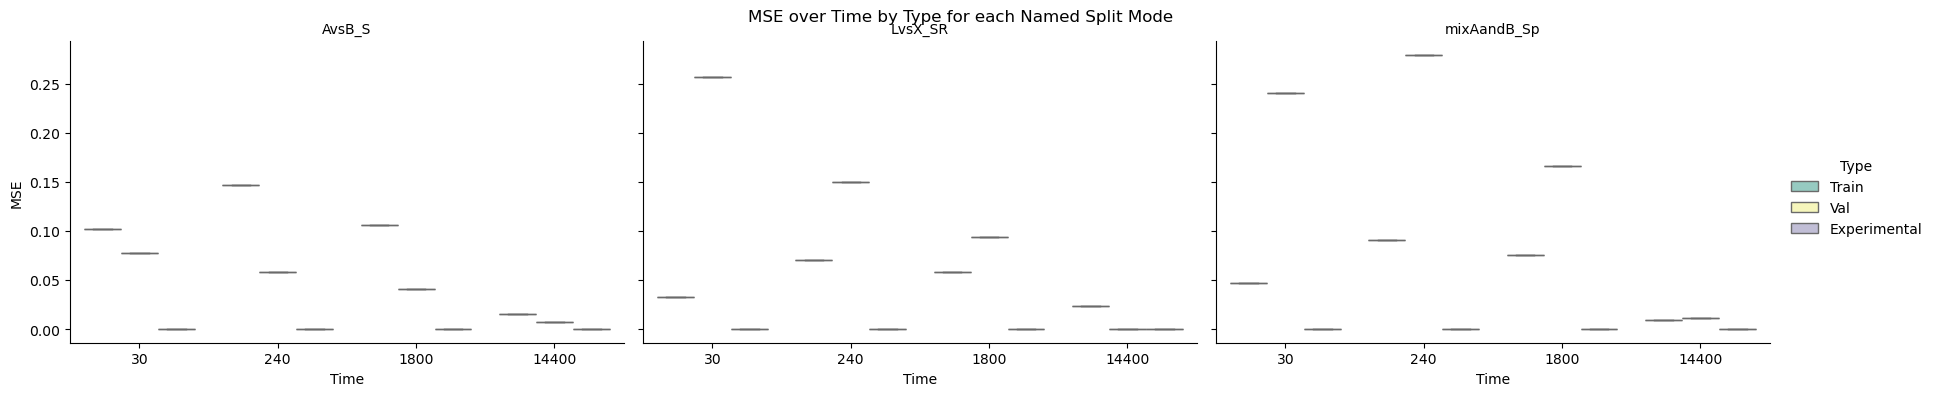

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('MSE over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "mse", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "MSE")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/alexi/anaconda3/envs/HDXER_ENV/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


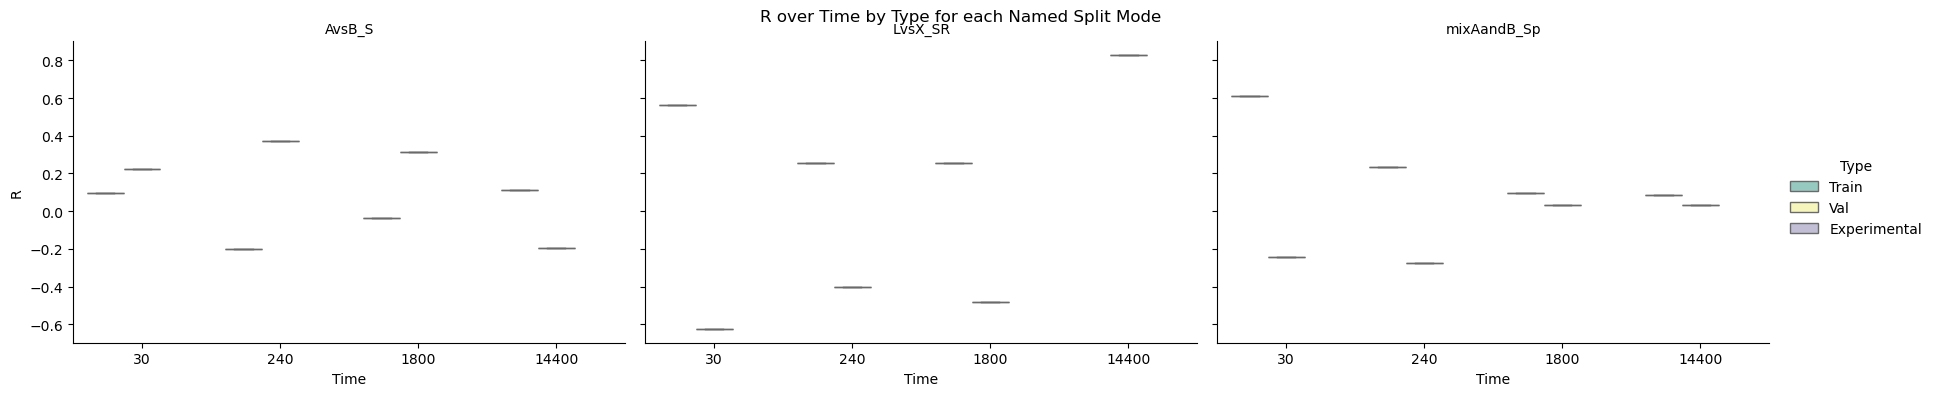

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Replace 'your_dataframe' with your actual DataFrame variable
df = analysis_df

# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('R over Time by Type for each Named Split Mode')

# Create boxplots
g = g.map(sns.boxplot, "time", "R", "Type", palette="Set3")

# Adding some additional options for better visualization
g.add_legend(title='Type')
g.set_axis_labels("Time", "R")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


                                               LogPf                calc_name  \
0  [13.970211328471937, 12.366151107694435, 14.27...      train_MBPwt1_test_1   
1  [0.5599999999999999, 0.6999999999999998, 0.559...  no_weight_MBPwt1_test_1   
2  [0.15110883110055687, 0.18888603887569608, 0.1...        val_MBPwt1_test_1   
3  [0.15110883110055687, 0.18888603887569608, 0.1...       test_MBPwt1_test_1   
0  [7.0878118772409255, 4.308571752394391, 13.556...      train_MBPwt1_test_1   
1  [0.5599999999999999, 0.6999999999999998, 0.559...  no_weight_MBPwt1_test_1   
2  [0.22676693433654693, 0.28345866792068364, 0.2...        val_MBPwt1_test_1   
3  [0.22676693433654693, 0.28345866792068364, 0.2...       test_MBPwt1_test_1   
0  [14.201507670317442, 13.56505625633377, 5.4343...      train_MBPwt1_test_1   
1  [0.5599999999999999, 0.6999999999999998, 0.559...  no_weight_MBPwt1_test_1   
2  [0.3916624086053377, 0.4895780107566721, 0.391...        val_MBPwt1_test_1   
3  [0.3916624086053377, 0.48

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

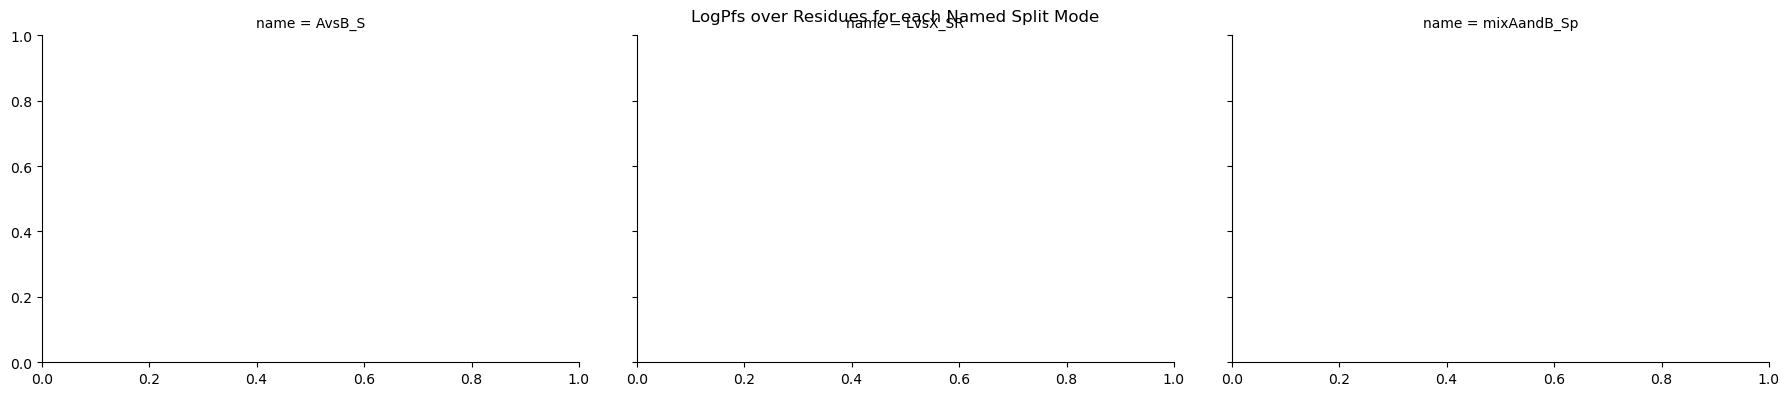

In [ ]:
# plot LogPfs by Residues colour by calc_name facet wrap by name
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
LogPfs = pd.concat([analysis_dumps[i]["LogPfs"] for i in names])

print(LogPfs)

LogPfs_df = LogPfs.explode(['LogPf','Residues'])


# Create a FacetGrid, using 'name' for each subplot
g = sns.FacetGrid(LogPfs_df, col="name", col_wrap=3, height=4, aspect=1.5)
g.fig.suptitle('LogPfs over Residues for each Named Split Mode')

# Create lineplots
g = g.map(sns.lineplot, "Residues", "LogPf", "calc_name", palette="Set2")

# Adding some additional options for better visualization
g.add_legend(title='calc_name')
g.set_axis_labels("Residues", "LogPf")
g.set_titles("{col_name}")

# Adjust the arrangement of the plots
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


In [ ]:
# from MDAnalysis.analysis.dssp import DSSP



In [ ]:
# VDX.paths.head()

In [ ]:
# print(top_path)

In [ ]:
# pdb_test = mda.Universe(top_path)

# # write out as a pdb and add header
# pdb_test.atoms.write('test.pdb')
# with open('test.pdb', 'r') as original: data = original.read()
# with open('test.pdb', 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)



In [ ]:


# def PDB_to_DSSP(top_path: str, dssp_path: str=None, sim_name: str=None):
#     """
#     Run DSSP on a PDB file to generate a DSSP file. Reads the output and returns a list of secondary structure elements.
#     Secondary structure elements are reduced to a single character: H (alpha helix), S (beta sheet), or L (loop).
#     Args:
#     - top_path (str): The path to the topology file to create the PDB file from.
#     - dssp_path (str): The path to save the DSSP file.
#     - sim_name (str): Simulation name to be included in the HEADER of the PDB file.
#     Returns:
#     - List of tuples, each containing the residue number and its secondary structure element.
#     """
#     temp_pdb = "do_mkdssp.pdb"

#     if sim_name is None:
#         sim_name = "DSSP HEADER"
#     if dssp_path is None:
#         dssp_path = "dssp_file.dssp"
#     print(top_path)
#     pdb_test = mda.Universe(top_path)

#     # write out as a pdb and add header
#     pdb_test.atoms.write(temp_pdb)


#     with open(temp_pdb, 'r') as original: data = original.read()
#     with open(temp_pdb, 'w') as modified: modified.write('HEADER    '+sim_name+'\n'+data)

#     # Run mkdssp to generate DSSP file
#     try:
#         subprocess.run(['mkdssp', temp_pdb,  dssp_path], check=True)
#     except subprocess.CalledProcessError as e:
#         print(f"Error running DSSP: {e}")
#         return []

#     # Parse the DSSP file
#     secondary_structures = []
#     with open(dssp_path, 'r') as dssp_file:
#         # Skip header lines
#         for line in dssp_file:
#             if line.startswith('  #  RESIDUE AA'):
#                 break
#         # Read the secondary structure assignments
#         for line in dssp_file:
#             if len(line) > 13:  # Ensure line has enough data
#                 residue_num = line[5:10].strip()
#                 ss = line[16]
#                 # Simplify the secondary structure to H, S, or L
#                 if ss in 'GHI':
#                     ss = 'H'  # Helix
#                 elif ss in 'EB':
#                     ss = 'S'  # Sheet
#                 else:
#                     ss = 'L'  # Loop or other
#                 secondary_structures.append((residue_num, ss))

#     # Cleanup temp PDB file
#     os.remove(temp_pdb)
#     os.remove(dssp_path)
#     print(len(secondary_structures))
#     print(len(pdb_test.residues))
#     return secondary_structures

